# Infering the phylogenetic relationship between archaic and AMH Y

In [1]:
library(tidyverse)
library(here)
library(phangorn)
library(cowplot)
library(lemon)

suppressPackageStartupMessages({
    library(ggtree)
    library(treeio)
})

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/archaic-ychr
Loading required package: ape

********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************


Attaching package: ‘lemon’

The following object is masked from ‘package:purrr’:

    %||%

Loading ychr


Bootstrapping info for ape/phangorn: http://ape-package.ird.fr/ape_faq.html#bootphylo

Locations of missing genotypes:

In [2]:
aln_full <- read.dna("../data/fasta/full_merged_nodmg.fa", format = "fasta")

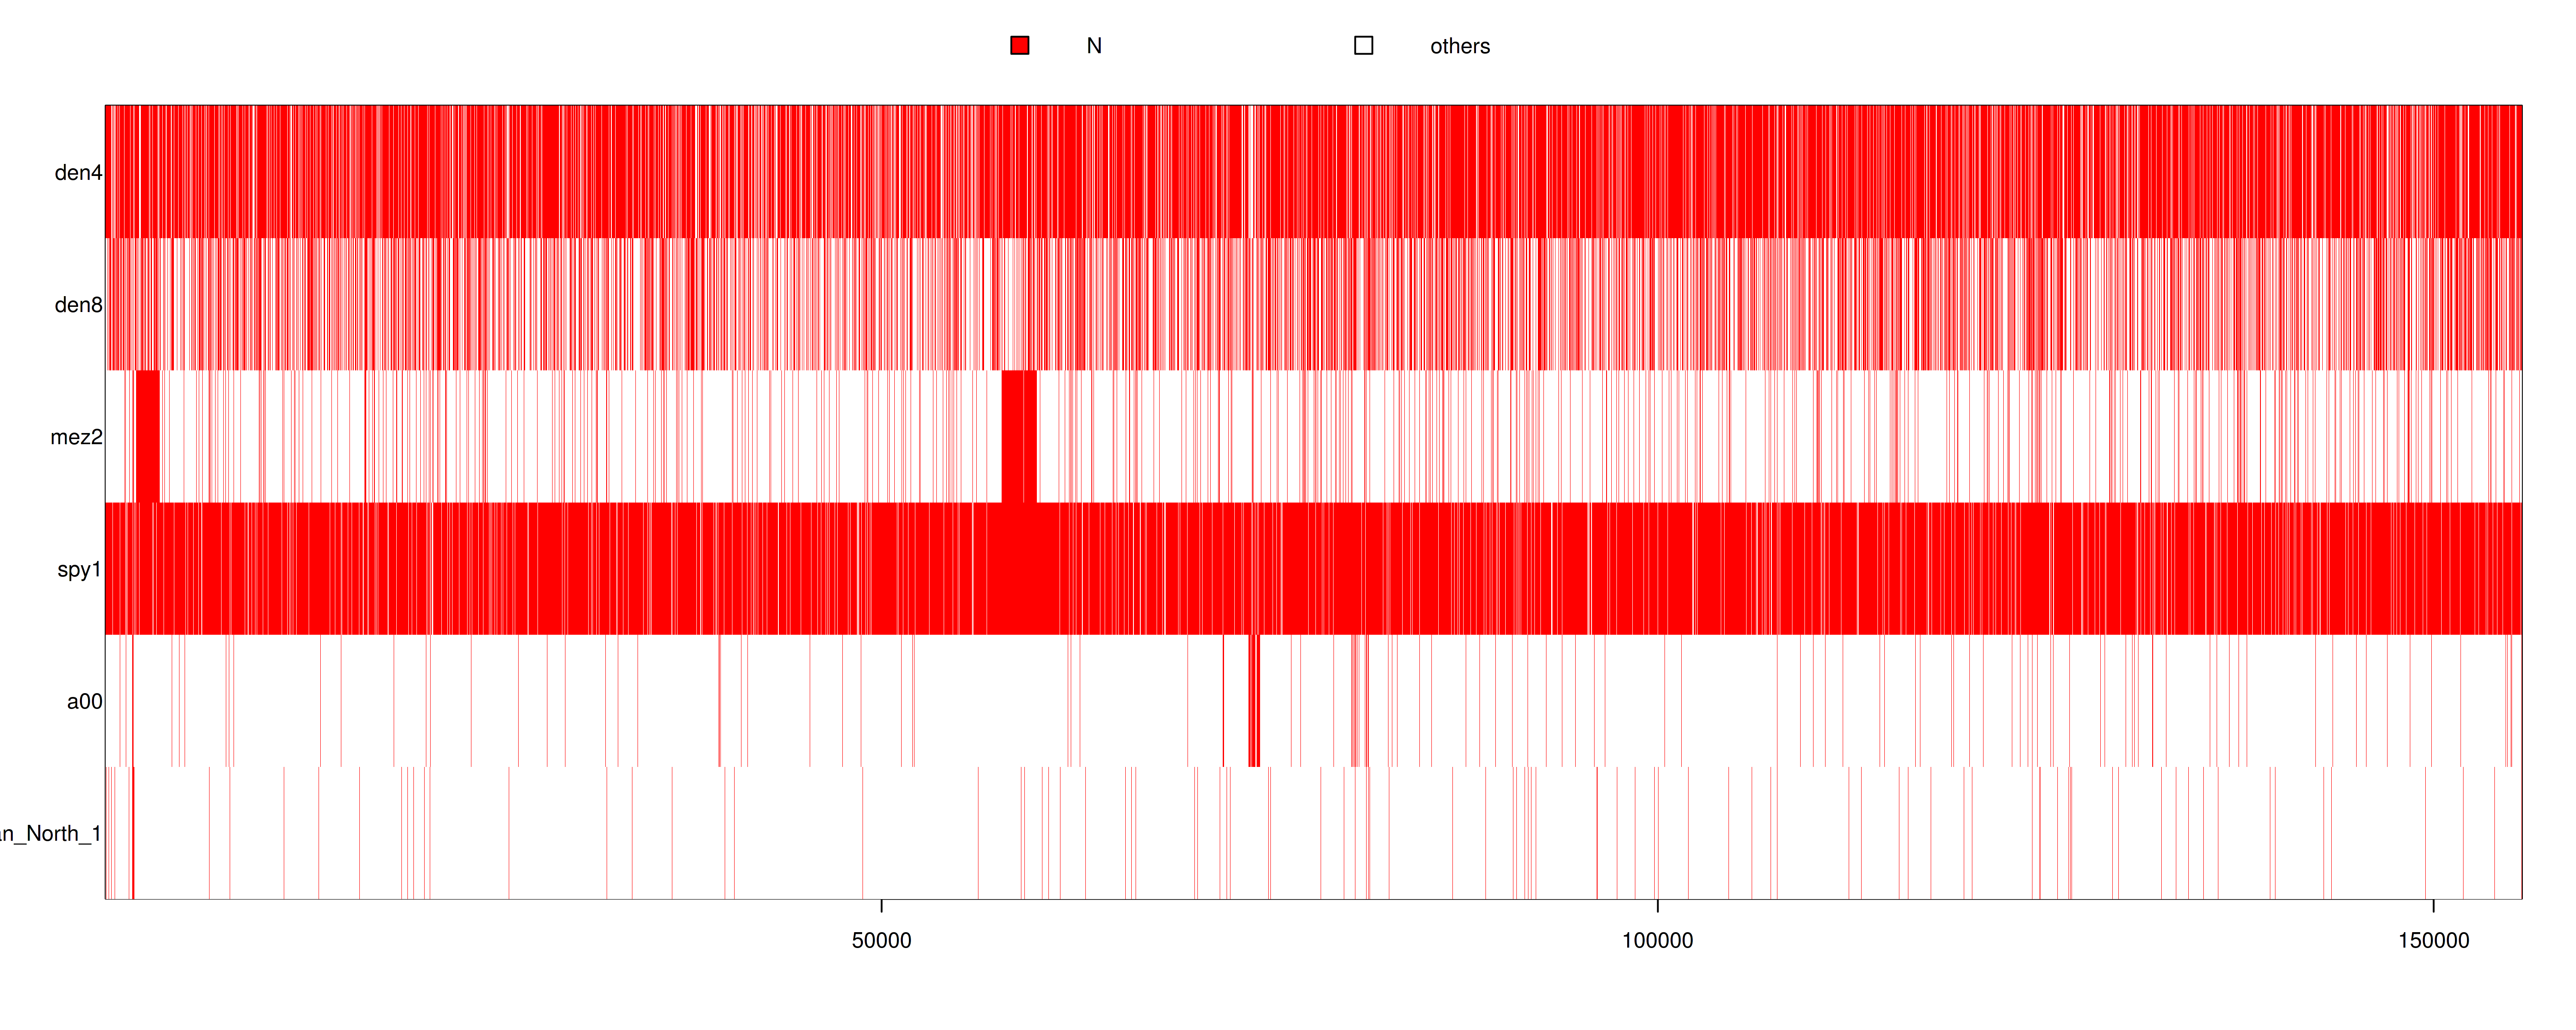

In [3]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "a00", "S_Ju_hoan_North_1"), ] %>%
    image("N")

Zooming on a Neanderthal-specific deletion?

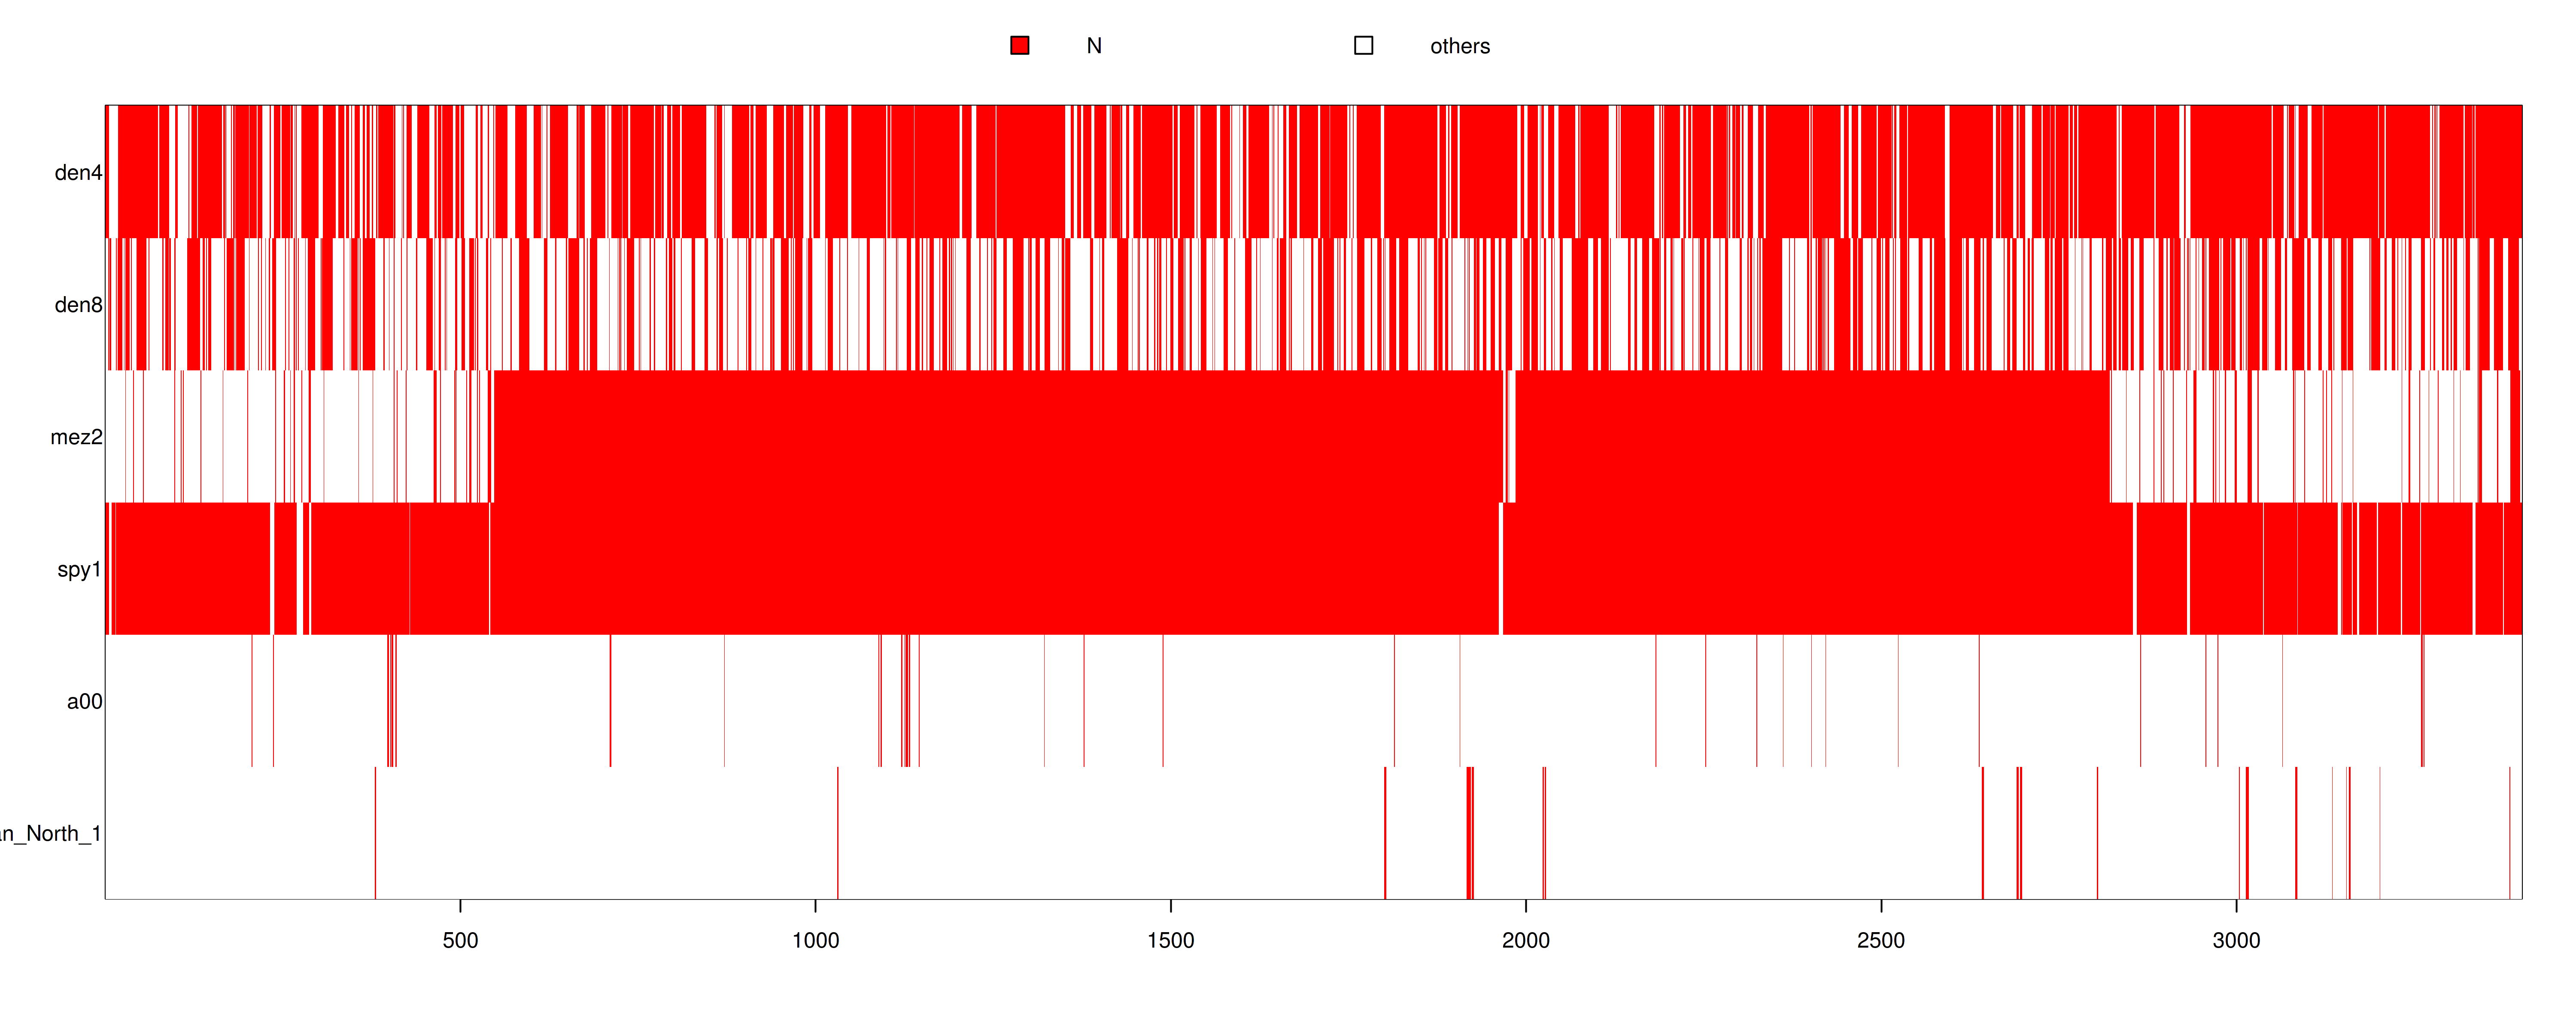

In [4]:
set_dim(20, 8)
aln_full[c("den4", "den8", "mez2", "spy1", "a00", "S_Ju_hoan_North_1"), 57200:60600] %>%
    image("N")

### Pairwise distances vs Mezmaiskaya 2 using `dist.dna` from ape

Without pairwise deletion:

In [5]:
for (m in c("raw", "N", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = F) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004317789       0.006044905       0.008635579       0.979274611 
Mez2 - N 
S_Ju_hoan_North_1               a00              den4             chimp 
                5                 7                10              1134 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004330266       0.006069397       0.008685679               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004331047       0.006070933       0.008688829               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004330518       0.006070409       0.008686697               NaN 


With pairwise deletion:

In [6]:
for (m in c("raw", "N", "JC69", "F81", "K80")) {
    cat("Mez2 -", m, "\n")
    dist.dna(aln_full, model = m, pairwise.deletion = T) %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - raw 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01311138        0.01316999        0.01621173        0.97072950 
Mez2 - N 
S_Ju_hoan_North_1               a00              den4             chimp 
             1773              1762               430            132789 
Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322734        0.01328700        0.01638951               NaN 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01323466        0.01329438        0.01640077               NaN 
Mez2 - K80 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322773        0.01328744        0.01639036               NaN 


### Pairwise distances vs Mezmaiskaya 2 using `dist.ml` from phangorn

Only two molecular evolution models are implemented, JC69 and F81:

In [7]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "none") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322734        0.01328700        0.01638951       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339060        0.01344657        0.01663280       10.00000000 


In [8]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "pairwise") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01322734        0.01328700        0.01638951       10.00000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
       0.01339060        0.01344657        0.01663280       10.00000000 


In [9]:
for (m in c("JC69", "F81")) {
    cat("Mez2 -", m, "\n")
    dist.ml(aln_full, model = m, exclude = "all") %>%
        as.matrix %>%
        .["mez2", ] %>%
        t %>%
        .[, c("S_Ju_hoan_North_1", "a00", "den4", "chimp")] %>% print
}

Mez2 - JC69 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004330266       0.006069397       0.008685679      10.000000000 
Mez2 - F81 
S_Ju_hoan_North_1               a00              den4             chimp 
      0.004374633       0.006136296       0.008787759      10.000000000 


It seems that given that it's important to use pairwise deletion (due to the large number of missing sites in archaic Y chromosomes), any reasonable default model is fine here. The "vs-chimp" distances are giving NaN values for some `dist.dna` models and also are always fixed to a hardcoded value 10 by the `dist.ml` function. After looking at the code, this seems to be a default value for overflow situations, which is affecting both methods regardless of the molecular evolution model (except for models which are simply based on the proportion of matching alleles such as the "raw" option in `dist.dna`).

It's also quite interesting that the "raw" proportions of sites give the same values as those obtained by more sophisticated models. I suppose this makes sense given the relatively short evolutionary time scale I'm dealing with here.

**Note**: Yeah, so the man page for `dist.dna` clearly says that

> If the sequences are very different, most evolutionary distances are undefined and a non-finite value (Inf or NaN) is returned. You may do dist.dna(, model = "raw") to check whether some values are higher than 0.75.

The explanation for this magic number comes from the limitations of the substitution models and is quite obvious from looking at the distance equations:

More details [here](https://www.megasoftware.net/mega1_manual/Distance.html):
> The Jukes-Cantor distance can be computed if p < 0.75; otherwise it is not applicable because the argument of the logarithm becomes negative. 

From the [mailing list](https://r-sig-phylo.r-project.narkive.com/NjZMUVzZ/bootstrapping-with-boot-phylo):
> the correct distance for (say) the Jukes-Cantor model or the Kimura 2-parameter model when the sequences differ by more than 75% is (positive) infinity, since these are inferred to be unrelated sequences

> Most models ("K80", "JC69" etc.) are not defined for distances >=0.75 and will return Inf or NaN (the 0.75 can vary a bit, depending on the substitution model)

The reason for the above is obvious - to make the calculations more efficient I saved only variable sites during the VCF -> FASTA conversion. Naturally, though, the molecular models predict distances that are too large to be meaningful. I will stick to the "raw" proportion measure, because it gives pretty much the same distance values as the more sophisticated models anyway.

## Neighbor-joining tree

In [10]:
aln_full <- read.phyDat("../data/fasta/full_merged_nodmg.fa", format = "fasta")

aln_full$ustishim <- NULL
aln_full$S_Ju_hoan_North_1 <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL
aln_full$S_French_1 <- NULL
aln_full$S_Karitiana_1 <- NULL
aln_full$S_Papuan_2 <- NULL
aln_full$S_Dai_2 <- NULL
aln_full$S_Han_2 <- NULL
aln_full$S_Turkish_1 <- NULL
aln_full$S_Finnish_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [11]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [12]:
tr <- buildtree_distdna_midpoint(aln_full)
bp <- boot.phylo(tr, aln_full, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [13]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin")

In [14]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [15]:
tr <- as.treedata(tr, bp)

In [16]:
tr <- drop.tip(tr, tip = "chimp")

den_node <- getMRCA(as.phylo(tr), tip = c("Denisova 4", "Denisova 8"))
neand_node <- getMRCA(as.phylo(tr), tip = c("Spy 94a", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [17]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

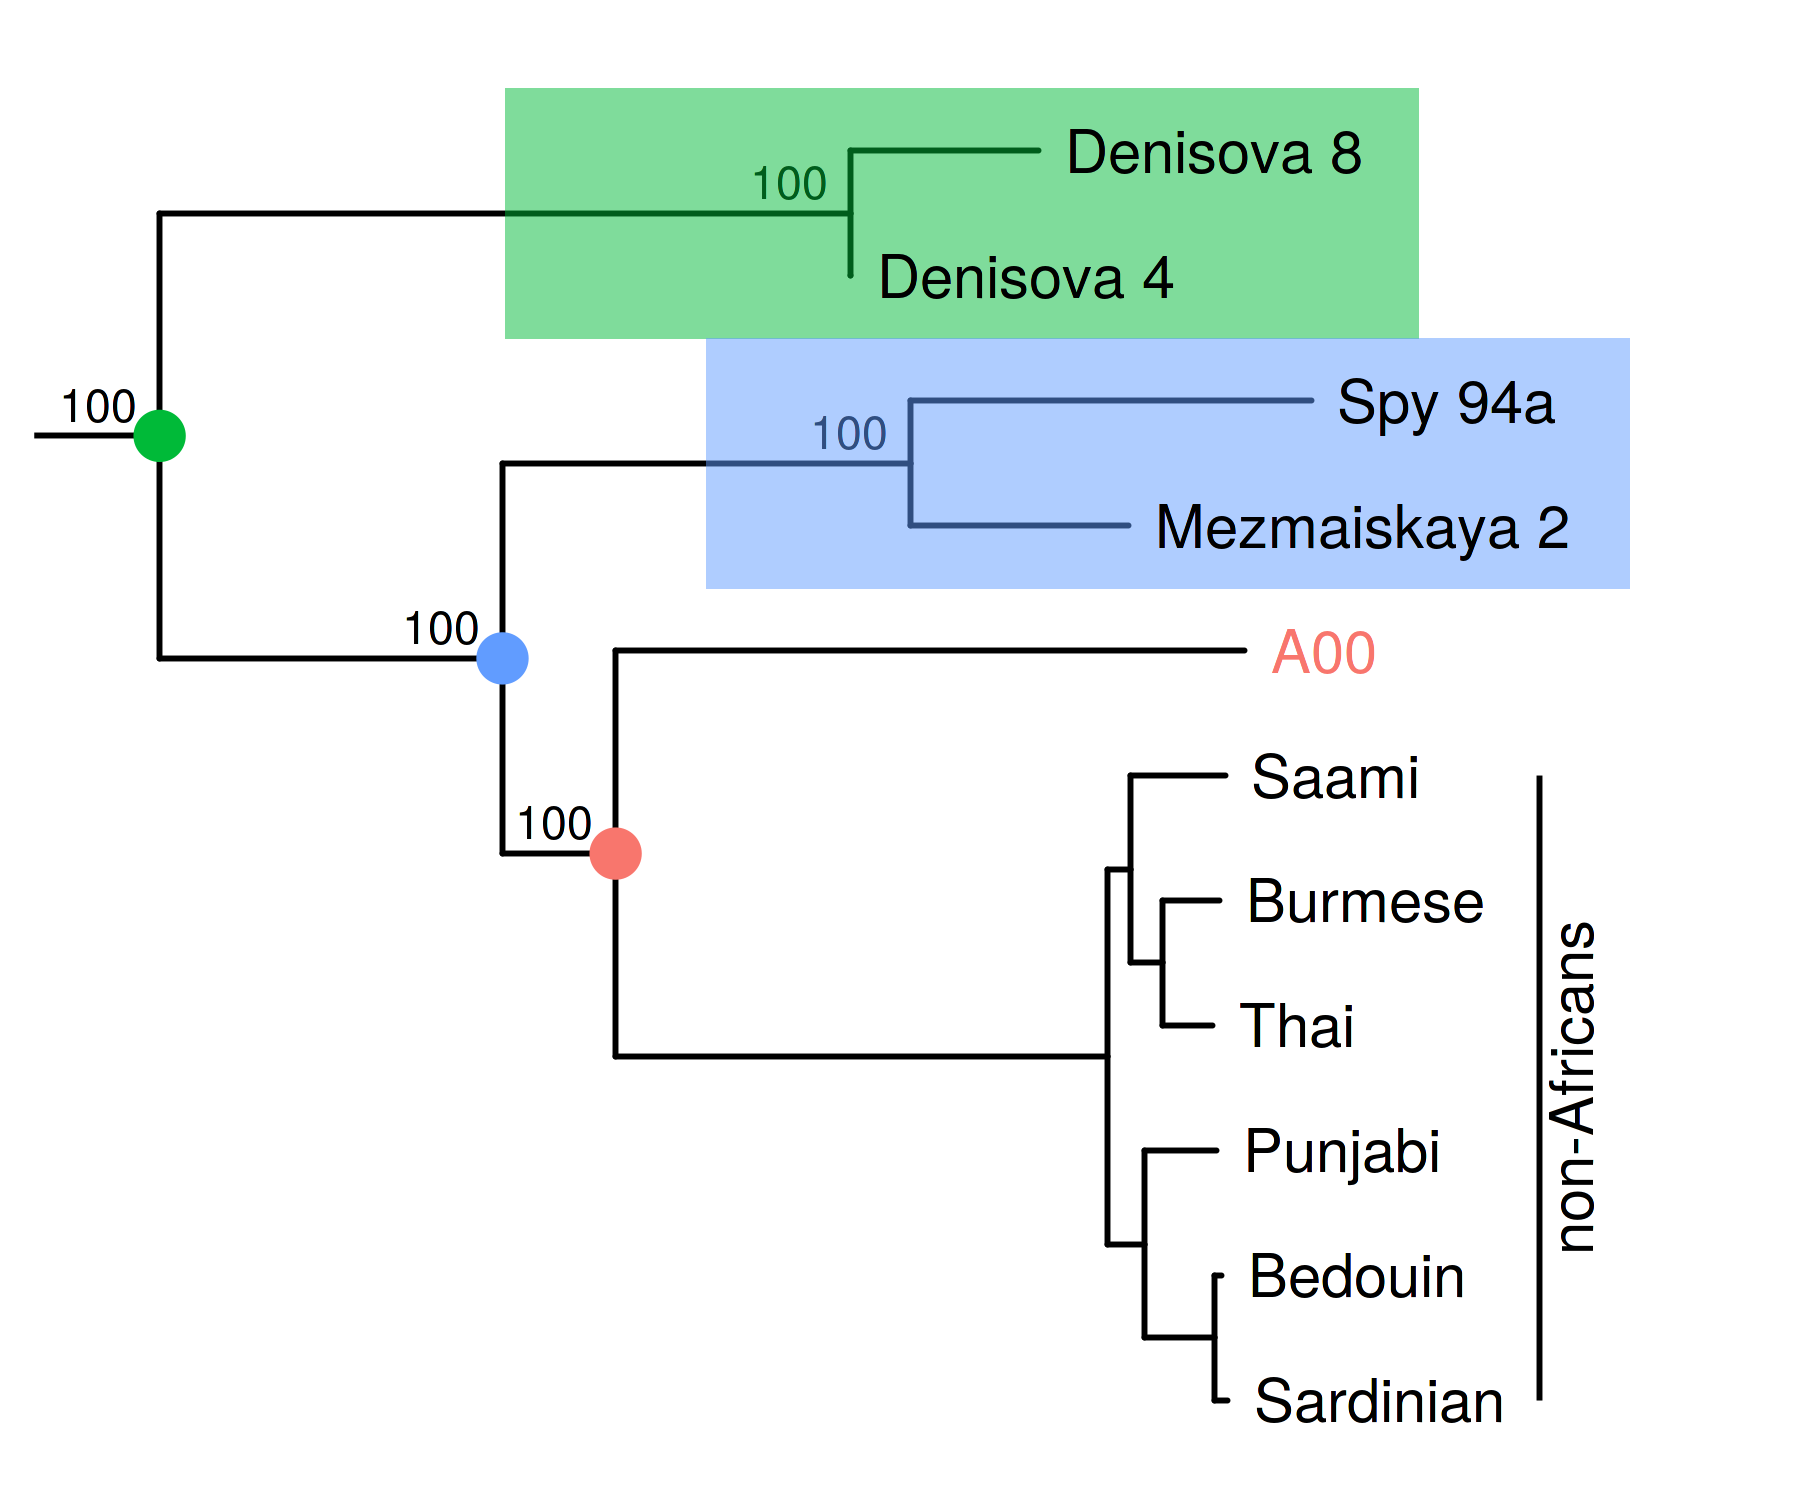

In [18]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0006, aes(label = bootstrap,
                   subset = node %in% c(den_node, neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = den_node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0031) +

    geom_cladelabel(offset.text = 0.0002, node = nonafr_node, angle = 90, hjust = "center",
                    offset = 0.002, align = T, label = "non-Africans", fontsize = 5) +

    geom_rootedge(rootedge = root_node)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5, color = colors[c(2, 3, 1)]) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015), bottom = "both", left = "none")# + theme_tree2()

ggsave(here("figures/maintree.tiff"), width = 6, height = 5)

## Neighbor-joining tree based on Lippold 560 kb capture regions

In [19]:
aln_lippold <- read.phyDat("../data/fasta/lippold_merged_allsnps.fa", format = "fasta")

aln_lippold$ustishim <- NULL
aln_lippold$spy1 <- NULL
aln_lippold$den4 <- NULL

aln_lippold$ustishim <- NULL
aln_lippold$S_Ju_hoan_North_1 <- NULL
aln_lippold$S_Dinka_1 <- NULL
aln_lippold$S_Mbuti_1 <- NULL
aln_lippold$S_Gambian_1 <- NULL
aln_lippold$S_Mandenka_1 <- NULL
aln_lippold$S_Yoruba_2 <- NULL
aln_lippold$S_French_1 <- NULL
aln_lippold$S_Karitiana_1 <- NULL
aln_lippold$S_Papuan_2 <- NULL
aln_lippold$S_Dai_2 <- NULL
aln_lippold$S_Han_2 <- NULL
aln_lippold$S_Turkish_1 <- NULL
aln_lippold$S_Finnish_2 <- NULL

aln_lippold <- as.DNAbin(aln_lippold)

In [20]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [21]:
tr <- buildtree_distdna_midpoint(aln_lippold)
bp <- boot.phylo(tr, aln_lippold, buildtree_distdna_midpoint, B = 100, mc.cores = 40)

Running parallel bootstraps... done.
Calculating bootstrap values... done.


In [22]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin") %>%
    str_replace(" \\(560 kb\\)", "")

In [23]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [24]:
tr <- as.treedata(tr, bp)

In [25]:
tr <- drop.tip(tr, tip = "chimp")

neand_node <- getMRCA(as.phylo(tr), tip = c("El Sidrón 1253", "Mezmaiskaya 2"))
amh_node <- getMRCA(as.phylo(tr), tip = c("A00", "Saami"))
nonafr_node <- getMRCA(as.phylo(tr), tip = c("Sardinian", "Saami"))
amhneand_node <- getMRCA(as.phylo(tr), tip = c("A00", "Mezmaiskaya 2"))
root_node <- getMRCA(as.phylo(tr), tip = c("Denisova 8", "A00"))

In [26]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

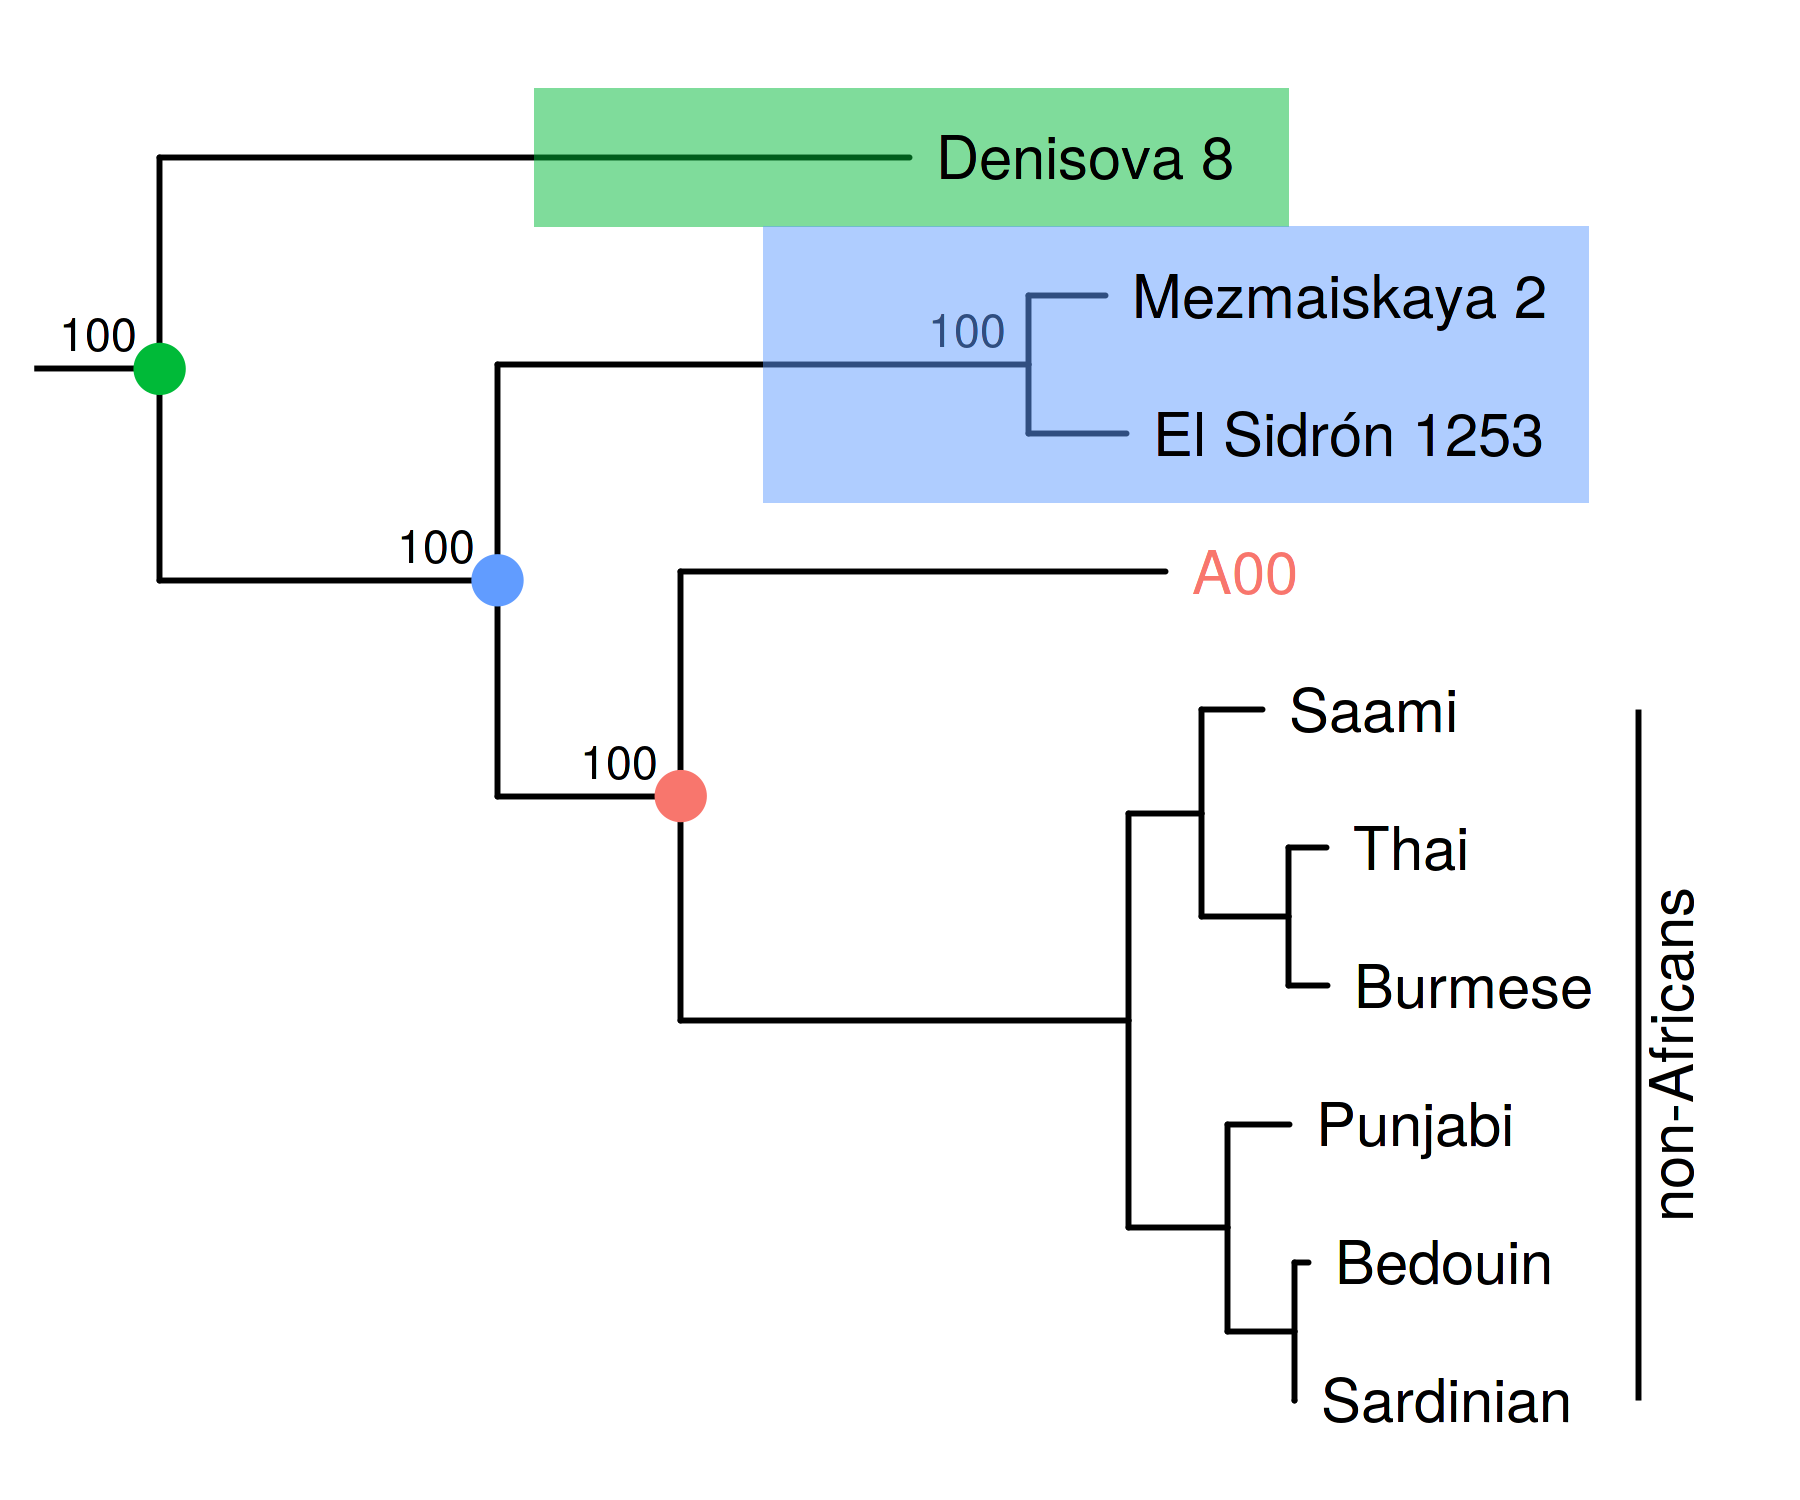

In [27]:
set_dim(6, 5)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_text2(nudge_y = 0.25, nudge_x = -0.0006, aes(label = bootstrap,
                   subset = node %in% c(neand_node, amh_node, amhneand_node, root_node))) +
    geom_hilight(node = filter(df, name == "Denisova 8")$node, fill = colors[2], extend = 0.0037) +
    geom_hilight(node = neand_node, fill = colors[3], extend = 0.0045) +

    geom_cladelabel(offset.text = 0.0002, node = nonafr_node, angle = 90, hjust = "center",
                    offset = 0.0028, align = T, label = "non-Africans", fontsize = 5) +

    geom_rootedge(rootedge = root_node)

p %<+% df +
    geom_tiplab(aes(color = sample_name == "A00"), offset = 0.0002, size = 5) +
    geom_point2(aes(subset = node %in% c(amhneand_node, root_node, amh_node)), size = 5, color = colors[c(2, 3, 1)]) +
    scale_color_manual(values = c("black", colors[1])) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.015), bottom = "both", left = "none")

# Tree for the contamination analysis

In [28]:
aln_full <- read.phyDat("../data/fasta/modern_var_full_merged.fa", format = "fasta")

aln_full$ustishim <- NULL
aln_full$S_Dinka_1 <- NULL
aln_full$S_Mbuti_1 <- NULL
aln_full$S_Gambian_1 <- NULL
aln_full$S_Mandenka_1 <- NULL
aln_full$S_Yoruba_2 <- NULL

aln_full <- as.DNAbin(aln_full)

In [29]:
buildtree_distdna_midpoint <- function(x) midpoint(nj(dist.dna(x, model = "raw", pairwise.deletion = T)))

In [30]:
tr <- buildtree_distdna_midpoint(aln_full)

In [31]:
tr$tip.label <- fix_name(tr$tip.label) %>%
    str_replace_all("S_(.*)_\\d+", "\\1") %>%
    str_replace("Ju_hoan_North", "Ju\\|\\'hoan") %>%
    str_replace("BedouinB", "Bedouin")

In [32]:
tr$edge.length <- ifelse(tr$edge.length < 0, 0, tr$edge.length)

In [33]:
tr <- drop.tip(tr, tip = "chimp")

In [34]:
df <- as_tibble(tr) %>%
    rename(name = label) %>%
    mutate(set = case_when(name %in% c("Denisova 4", "Denisova 8") ~ "Denisova",
                           name %in% c("Spy 94a", "Mezmaiskaya 2") ~ "Neanderthal",
                           name == "A00" ~ "A00",
                           TRUE ~ "other")) %>%
    mutate(sample_name = fix_name(name) %>% str_replace("^S_", ""))

In [35]:
ingroup <- c('Bedouin', 'Turkish', 'French', 'Burmese', 'Thai', 'Finnish', 'Sardinian',
             'Han', 'Dai', 'Punjabi', 'Saami', 'Papuan', 'Karitiana')

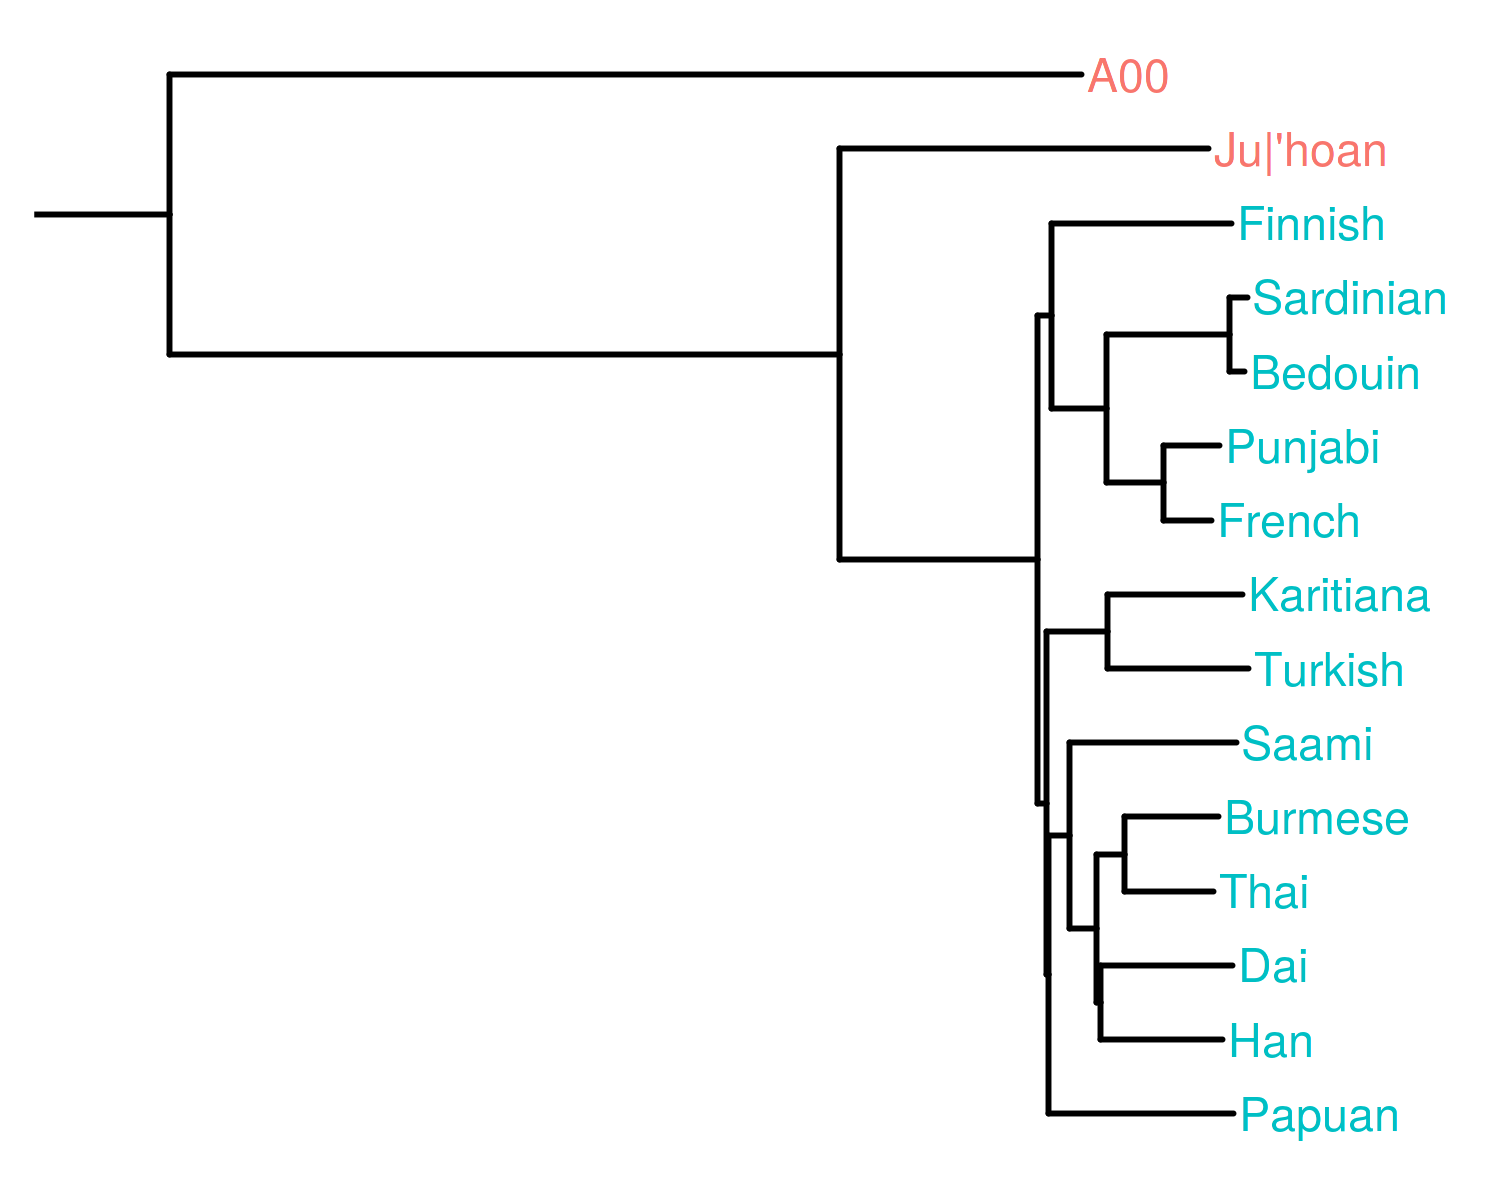

In [36]:
set_dim(5, 4)

colors <- scales::hue_pal()(3)

p <- ggtree(tr, ladderize = F) +
    geom_rootedge(rootedge = getMRCA(as.phylo(tr), c("A00", "Bedouin")))

p %<+% df +
    geom_tiplab(aes(color = name %in% ingroup)) +
    coord_capped_cart(gap = 1, x = c(-0.00045, 0.008), bottom = "both", left = "none")

### Distance matrices on all vs variable-sites-only data - investigating the Chimp distance problem above

Distance matrices using complete Y chromosome data:

In [37]:
x <- read.dna("../data/fasta/modern_all_full_merged.fa", format = "fasta")

In [38]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(x, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                   S_Gambian_1    S_Dinka_1    S_Mbuti_1  S_Turkish_1
S_Dinka_1         8.391606e-05                                       
S_Mbuti_1         1.857159e-05 8.643813e-05                          
S_Turkish_1       1.112002e-04 1.093660e-04 1.137223e-04             
S_Dai_2           1.059268e-04 1.031755e-04 1.084489e-04 7.589130e-05
S_Yoruba_2        1.604952e-05 8.345751e-05 1.857159e-05 1.112002e-04
S_Papuan_2        1.095953e-04 1.073025e-04 1.121174e-04 7.910121e-05
chimp             3.460322e-02 3.460231e-02 3.460575e-02 3.460942e-02
S_Thai_1          1.036340e-04 1.013413e-04 1.061561e-04 7.359852e-05
S_BedouinB_1      1.100539e-04 1.077611e-04 1.125759e-04 8.368679e-05
S_Burmese_1       1.043219e-04 1.020291e-04 1.068440e-04 7.428635e-05
ustishim          7.222284e-05 6.993005e-05 7.474491e-05 4.218731e-05
S_Ju_hoan_North_1 1.538461e-04 1.515533e-04 1.563682e-04 1.582024e-04
S_Mandenka_1      1.582024e-05 8.368679e-05 1.192250e-05 1.109710e-04
S_Karitiana_1  

Distance matrices using variable-sites only Y chromosome data:

In [39]:
y <- read.dna("../data/fasta/modern_var_full_merged.fa", format = "fasta")

In [40]:
for (m in c("raw", "JC69")) {
    cat(m, "\n")
    dist.dna(y, model = m, pairwise.deletion = F) %>% print
    cat("\n\n\n")
}

raw 
                    S_French_1  S_Gambian_1  S_Turkish_1      S_Han_2
S_Gambian_1       0.0029312552                                       
S_Turkish_1       0.0021838177 0.0031522368                          
S_Han_2           0.0019563366 0.0029507536 0.0020993247             
S_Karitiana_1     0.0021188231 0.0030872422 0.0015858676 0.0020343301
S_BedouinB_1      0.0013193898 0.0031197395 0.0023723019 0.0021448209
S_Sardinian_1     0.0013128904 0.0031132400 0.0023658025 0.0021383215
S_Finnish_2       0.0018913421 0.0030547449 0.0023073073 0.0020798263
chimp             0.9808395999 0.9809110939 0.9810865793 0.9808720972
S_Yoruba_2        0.0029312552 0.0004549620 0.0031522368 0.0029507536
S_Thai_1          0.0019433377 0.0029377547 0.0020863258 0.0013518871
a00               0.0112765584 0.0113610514 0.0114975400 0.0112960568
S_Ju_hoan_North_1 0.0042506451 0.0043611358 0.0044846255 0.0042701434
S_Burmese_1       0.0019628361 0.0029572531 0.0021058242 0.0013713855
S_Mbuti_1      